In [2]:
import boxx  
# boxx: A Tool-box for Efficient Build and Debug in Python. Especially for Scientific Computing and Computer Vision.
# For more infomation about boxx : https://github.com/DIYer22/boxx

import numpy as np
import pandas as pd 
import random
import os
import glob
from skimage.io import imread

<h1>Load Image</h1>

(1944, 2592, 3)


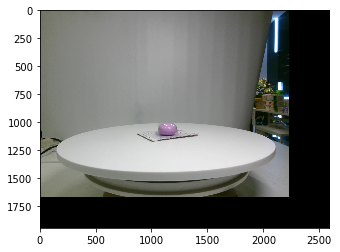

In [15]:
# visualization of train image (single image)
train_image = imread(glob.glob("./aco_data/train2019/*")[53738]) # 53739 images in total in the train set
print(train_image.shape) #All images have the same shape (1944, 2592, 3)
boxx.show(train_image)


(1944, 2592, 3)


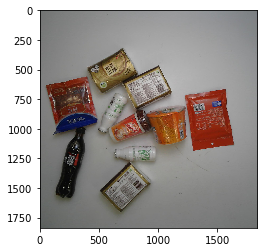

In [16]:
# visualization of validation image (single image)
val_image = imread(glob.glob("./aco_data/val2019/*")[5999]) # 6000 images in total in the train set
print(train_image.shape) #All images have the same shape (1944, 2592, 3)
boxx.show(val_image)

(1944, 2592, 3)


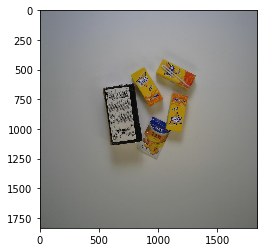

In [20]:
# visualization of test image (single image)
test_image = imread(glob.glob("./aco_data/test2019/*")[23999]) # 24000 images in total in the test set
print(train_image.shape) #All images have the same shape (1944, 2592, 3)
boxx.show(test_image)

<h1>Load Annotations</h1>

In [9]:
# Loading annotation files
train_js =  boxx.loadjson('./aco_data/instances_train2019.json')
val_js =  boxx.loadjson('./aco_data/instances_val2019.json')
test_js = boxx.loadjson('./aco_data/instances_test2019.json')

# Visualization struct of instances_train2019.json
print("train")
boxx.tree(train_js, deep=1)
print("validation")
boxx.tree(val_js, deep=1)
print("test")
boxx.tree(test_js, deep=1)

#categories represents total number of classes (SKU). All datasets have 200 SKUs
#images is the image level annotation of each dataset
#annotations is the object level annotation of each dataset.
#for example in train, each image only have one annotation
#in validation, each image would have around 12 annotations since there are multiple objects in an image

train
└── /: dict  6
    ├── info: dict  7
    ├── licenses: list  1
    ├── categories: list  200
    ├── __raw_Chinese_name_df: list  200
    ├── images: list  53739
    └── annotations: list  53739
validation
└── /: dict  6
    ├── info: dict  7
    ├── licenses: list  1
    ├── categories: list  200
    ├── __raw_Chinese_name_df: list  200
    ├── images: list  6000
    └── annotations: list  73602
test
└── /: dict  6
    ├── info: dict  7
    ├── licenses: list  1
    ├── categories: list  200
    ├── __raw_Chinese_name_df: list  200
    ├── images: list  24000
    └── annotations: list  294333


In [24]:
# Let's see instances_test2019.json in detail
from pprint import pprint

#There are 200 categories in total. Each category has an id(0-199), name and the supercategory it belongs to(20 in total)
print("categories")
pprint(test_js['categories'])

#test set has 24000 image annotations in total, each image annotation has a file_name, 
# height/width: (here is the original size, different from the 1944x2592x3 fixed size above, which add 0 paddings to unify the size)
# id: the id of this image
# level: hard/medium/easy
print("images")
pprint(test_js['images'][0])

#test set has 294333 object level annotations in total, each object annotation has
#area: area size of the bbox
#bbox: [x, y, w, h]
#category_id: which SKU it belongs to
#id: id of this object level annotation
#image_id: which image does this annotation belongs to, one image can have multiple object annotations
#is_crowd: no idea what is this
#point_xy: point level annotation, coordinates of the bbox center
#segmentation: lol, not given
print("annotations")
pprint( test_js['annotations'][0])


categories
[{'id': 1, 'name': '1_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 2, 'name': '2_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 3, 'name': '3_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 4, 'name': '4_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 5, 'name': '5_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 6, 'name': '6_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 7, 'name': '7_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 8, 'name': '8_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 9, 'name': '9_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 10, 'name': '10_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 11, 'name': '11_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 12, 'name': '12_puffed_food', 'supercategory': 'puffed_food'},
 {'id': 13, 'name': '13_dried_fruit', 'supercategory': 'dried_fruit'},
 {'id': 14, 'name': '14_dried_fruit', 'supercategory': 'dried_fruit'},
 {'id': 15, '

<h1> Useful APIs</h1>

In [26]:
# Return all the object level annotations of a specific image. Annotation of all objects and imageID should be provided
# Return object is an array of dictionary
def getAllAnnoByImageID(annotations, imageID):
    df = pd.DataFrame(annotations)
    return (df[df['image_id'] == imageID]).to_dict(orient='records')

In [28]:
# Example usage
itemList = getAllAnnoByImageID(test_js['annotations'], 2990)
print(itemList)

[{'area': 292963.89, 'bbox': [1164.8, 616.95, 522.86, 560.31], 'category_id': 179, 'id': 15280, 'image_id': 2990, 'iscrowd': 0, 'point_xy': [1426.23, 897.11], 'segmentation': [[]]}, {'area': 777659.64, 'bbox': [406.27, 273.58, 845.93, 919.29], 'category_id': 24, 'id': 15281, 'image_id': 2990, 'iscrowd': 0, 'point_xy': [829.23, 733.22], 'segmentation': [[]]}, {'area': 214284.01, 'bbox': [874.5, 1022.75, 379.27, 565.0], 'category_id': 20, 'id': 15282, 'image_id': 2990, 'iscrowd': 0, 'point_xy': [1064.13, 1305.25], 'segmentation': [[]]}, {'area': 175975.75, 'bbox': [593.56, 961.88, 327.76, 536.9], 'category_id': 20, 'id': 15283, 'image_id': 2990, 'iscrowd': 0, 'point_xy': [757.44, 1230.33], 'segmentation': [[]]}, {'area': 136245.18, 'bbox': [1227.85, 1091.46, 413.79, 329.26], 'category_id': 152, 'id': 15284, 'image_id': 2990, 'iscrowd': 0, 'point_xy': [1434.74, 1256.09], 'segmentation': [[]]}, {'area': 83858.22, 'bbox': [418.12, 906.11, 253.74, 330.48], 'category_id': 152, 'id': 15285, 'i

<h1> Show Statistics of the Dataset (Not quite useful) </h1>

In [28]:
# Statistic the RPC dataset in different split set

def statistic_rpc_json_dataset(js, split_name=None):
    '''
    statistic dataset, input a coco format json file, then print and return `boxx.Markdown` instance
    note: `boxx.Markdown` is a sub class of `pd.DataFrame`
    '''
    df = pd.DataFrame(js['annotations'])
    images = len(js['images'])
    objects = len(js['annotations'])
    
    object_number_per_image = df.groupby('image_id').id.count().mean()
    category_number_per_image = df.groupby('image_id').apply(lambda sdf: len(set(sdf.category_id))).mean()
    
    markdown_df = pd.DataFrame([dict(split_name=split_name, 
                                     images=images, objects=objects, 
                                     object_number_per_image=round(object_number_per_image,2), 
                                     category_number_per_image=round(category_number_per_image,2))])
    markdown = boxx.Markdown(markdown_df[['split_name', 'images', 'objects',  'object_number_per_image','category_number_per_image', ]])
    #boxx.g()
    print(markdown)
    return markdown

statistic_rpc_json_dataset(train_js, 'train')
statistic_rpc_json_dataset(val_js, 'val')
statistic_rpc_json_dataset(test_js, 'test')

| split_name | images | objects | object_number_per_image | category_number_per_image |
|       ---: |   ---: |    ---: |                    ---: |                      ---: |
|      train |  53739 |   53739 |                     1.0 |                       1.0 |
| split_name | images | objects | object_number_per_image | category_number_per_image |
|       ---: |   ---: |    ---: |                    ---: |                      ---: |
|        val |   6000 |   73602 |                   12.27 |                      6.33 |
| split_name | images | objects | object_number_per_image | category_number_per_image |
|       ---: |   ---: |    ---: |                    ---: |                      ---: |
|       test |  24000 |  294333 |                   12.26 |                      6.31 |


,split_name,images,objects,object_number_per_image,category_number_per_image
0,test,24000,294333,12.26,6.31


In [29]:
# Statistic checkout(val+test) sets for different clutters

for level in ["easy", "medium", "hard"]:
    level_images = filter(lambda d:d['level']==level, test_js['images']+val_js['images'])
    level_images = list(level_images)
    
    level_image_ids = set([d['id'] for d in level_images])
    level_annotations = list(filter(lambda d:d['image_id'] in level_image_ids, test_js['annotations']+val_js['annotations'] ))
    
    level_js = dict(images=level_images,annotations=level_annotations)
    statistic_rpc_json_dataset(level_js, level)

| split_name | images | objects | object_number_per_image | category_number_per_image |
|       ---: |   ---: |    ---: |                    ---: |                      ---: |
|       easy |  10000 |   71496 |                    7.15 |                      3.81 |
| split_name | images | objects | object_number_per_image | category_number_per_image |
|       ---: |   ---: |    ---: |                    ---: |                      ---: |
|     medium |  10000 |  122961 |                    12.3 |                      6.27 |
| split_name | images | objects | object_number_per_image | category_number_per_image |
|       ---: |   ---: |    ---: |                    ---: |                      ---: |
|       hard |  10000 |  173478 |                   17.35 |                      8.87 |
